## Keras Test

In [1]:
# Plot ad hoc mnist instances
import tensorflow as tf
import matplotlib.pyplot as plt


/home/shong/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shong/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shong/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shong/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [2]:
tf.keras.backend.backend()

'tensorflow'

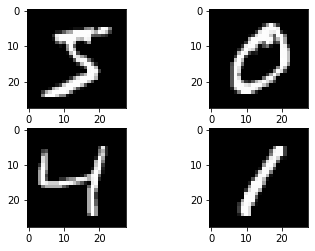

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### MLP

In [4]:
%%time
# Baseline MLP for MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.2778 - acc: 0.9221 - val_loss: 0.1401 - val_acc: 0.9584
Epoch 2/10
60000/60000 - 1s - loss: 0.1113 - acc: 0.9679 - val_loss: 0.0899 - val_acc: 0.9731
Epoch 3/10
60000/60000 - 1s - loss: 0.0711 - acc: 0.9792 - val_loss: 0.0812 - val_acc: 0.9757
Epoch 4/10
60000/60000 - 1s - loss: 0.0503 - acc: 0.9854 - val_loss: 0.0684 - val_acc: 0.9796
Epoch 5/10
60000/60000 - 1s - loss: 0.0370 - acc: 0.9896 - val_loss: 0.0600 - val_acc: 0.9811
Epoch 6/10
60000/60000 - 1s - loss: 0.0265 - acc: 0.9929 - val_loss: 0.0590 - val_acc: 0.9824
Epoch 7/10
60000/60000 - 1s - loss: 0.0198 - acc: 0.9952 - val_loss: 0.0603 - val_acc: 0.9808
Epoch 8/10
60000/60000 - 1s - loss: 0.0146 - acc: 0.9969 - val_loss: 0.0584 - val_acc: 0.9810
Epoch 9/10
60000/60000 - 1s - loss: 0.0102 - acc: 0.9980 - val_loss: 0.0611 - va

### CNN

In [5]:
%%time
# Simple CNN for the MNIST Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as np_utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2330 - acc: 0.9344 - val_loss: 0.0699 - val_acc: 0.9793
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0710 - acc: 0.9790 - val_loss: 0.0522 - val_acc: 0.9838
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0497 - acc: 0.9847 - val_loss: 0.0389 - val_acc: 0.9864
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0379 - acc: 0.9880 - val_loss: 0.0365 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0310 - acc: 0.9902 - val_loss: 0.0346 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0340 - val_acc: 0.988